# Deep Learning Indonesia.AI
Pertemuan - 1 Review Linear Regression & Logistic Regression

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
sns.set(color_codes=True)
%matplotlib inline

# Load Data

In [3]:
df = pd.read_csv('banking.csv')

# Exploratory Data Analysis

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## Total Data

In [5]:
print(f'Total Data : {df.shape[0]}')
print(f'Total Column : {df.shape[1]}')

Total Data : 41188
Total Column : 21


## List Columns

In [6]:
print('List Columns :')
for i in df.columns:
    print(i)

List Columns :
age
job
marital
education
default
housing
loan
contact
month
day_of_week
duration
campaign
pdays
previous
poutcome
emp_var_rate
cons_price_idx
cons_conf_idx
euribor3m
nr_employed
y


## Check Missing Value

In [7]:
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
y                 False
dtype: bool

In [8]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [9]:
df['education'] = np.where(df['education'] =='basic.9y', 'basic', df['education'])

In [10]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school', 'basic',
       'professional.course', 'basic.6y', 'illiterate'], dtype=object)

In [11]:
df['education']=np.where(df['education'] =='basic.6y', 'basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'basic', df['education'])

In [12]:
df['education'].unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

## Visualisasi Label

In [13]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

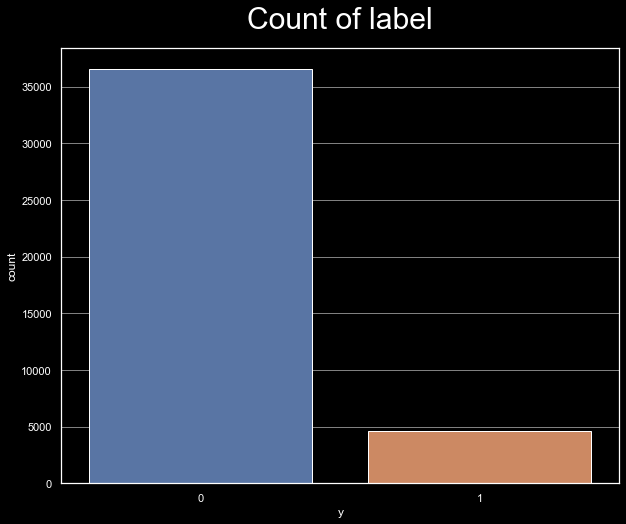

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x='y', data=df)
plt.title('Count of label', fontsize=30, pad=20)
plt.show()

In [15]:
df.groupby('y').mean().T

y,0,1
age,39.911185,40.913147
duration,220.844807,553.191164
campaign,2.633085,2.051724
pdays,984.113878,792.035560
previous,0.132374,0.492672
emp_var_rate,0.248875,-1.233448
cons_price_idx,93.603757,93.354386
cons_conf_idx,-40.593097,-39.789784
euribor3m,3.811491,2.123135
nr_employed,5176.166600,5095.115991


In [16]:
df.groupby('job').mean().T

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
age,38.187296,39.555760,41.723214,45.500000,42.362859,62.027326,39.949331,37.926430,25.894857,38.507638,39.733728,45.563636
duration,254.312128,264.542360,263.267857,250.454717,257.058140,273.712209,264.142153,258.398085,283.683429,250.232241,249.451677,239.675758
campaign,2.623489,2.558461,2.535714,2.639623,2.476060,2.476744,2.660802,2.587805,2.104000,2.577339,2.564103,2.648485
pdays,954.319229,985.160363,981.267170,960.579245,962.647059,897.936047,976.621393,979.974049,840.217143,964.408127,935.316568,938.727273
previous,0.189023,0.122542,0.138736,0.137736,0.185021,0.327326,0.143561,0.154951,0.524571,0.153789,0.199211,0.154545
emp_var_rate,0.015563,0.248995,0.158723,0.433396,-0.012688,-0.698314,0.094159,0.175359,-1.408000,0.274566,-0.111736,0.357879
cons_price_idx,93.534054,93.656656,93.605372,93.676576,93.522755,93.430786,93.559982,93.634659,93.331613,93.561471,93.563781,93.718942
cons_conf_idx,-40.245433,-41.375816,-41.283654,-39.495283,-40.489466,-38.573081,-40.488107,-41.290048,-40.187543,-39.927569,-40.007594,-38.797879
euribor3m,3.550274,3.771996,3.791120,4.009645,3.611316,2.770066,3.689376,3.699187,1.884224,3.820401,3.466583,3.949033
nr_employed,5164.125350,5175.615150,5176.313530,5179.529623,5166.650513,5122.262151,5170.674384,5171.600126,5085.939086,5175.648391,5157.156509,5172.931818


In [17]:
df.groupby('education').mean().T

education,basic,high.school,illiterate,professional.course,university.degree,unknown
age,42.163910,37.998213,48.500000,40.080107,38.879191,43.481225
duration,263.043874,260.886810,276.777778,252.533855,253.223373,262.390526
campaign,2.559498,2.568576,2.277778,2.586115,2.563527,2.596187
pdays,974.877967,964.358382,943.833333,960.765974,951.807692,942.830734
previous,0.141053,0.185917,0.111111,0.163075,0.192390,0.226459
emp_var_rate,0.191329,0.032937,-0.133333,0.173012,-0.028090,0.059099
cons_price_idx,93.639933,93.584857,93.317333,93.569864,93.493466,93.658615
cons_conf_idx,-40.927595,-40.940641,-39.950000,-40.124108,-39.975805,-39.877816
euribor3m,3.729654,3.556157,3.516556,3.710457,3.529663,3.571098
nr_employed,5172.014113,5164.994735,5171.777778,5170.155979,5163.226298,5159.549509


## Data Visualization

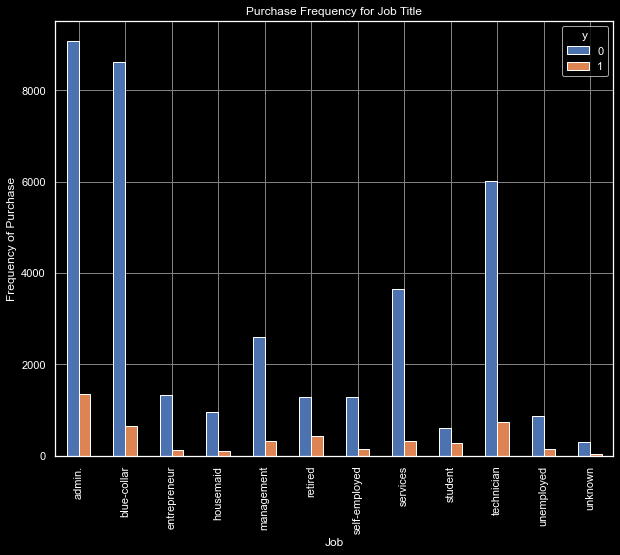

In [34]:
pd.crosstab(df.job,df.y).plot(kind='bar', figsize=(10,8))
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()

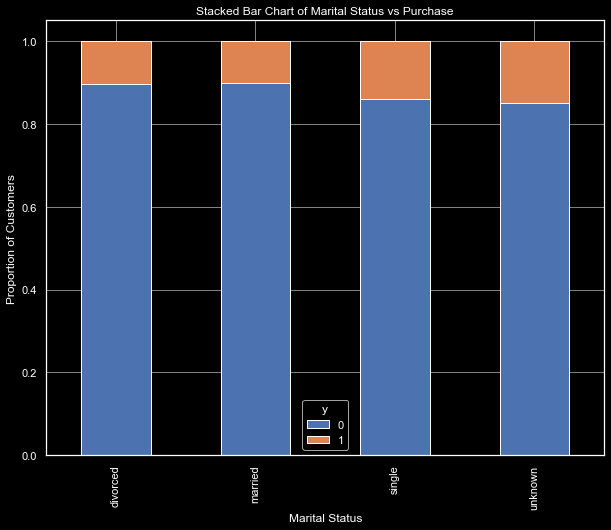

In [19]:
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10,8))
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.show()

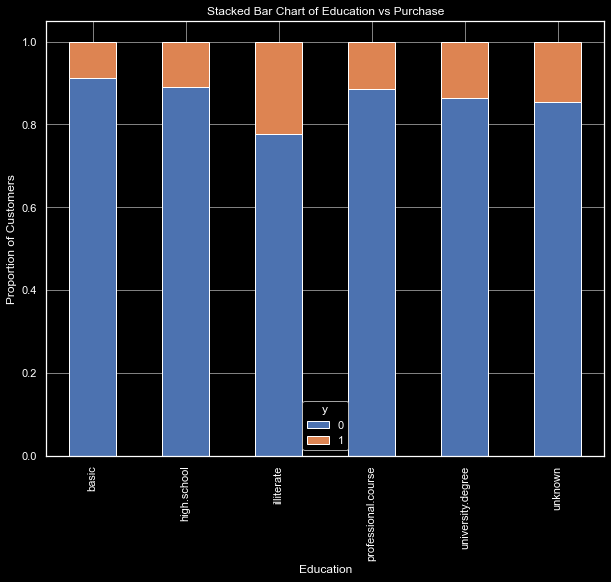

In [20]:
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10,8))
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.show()

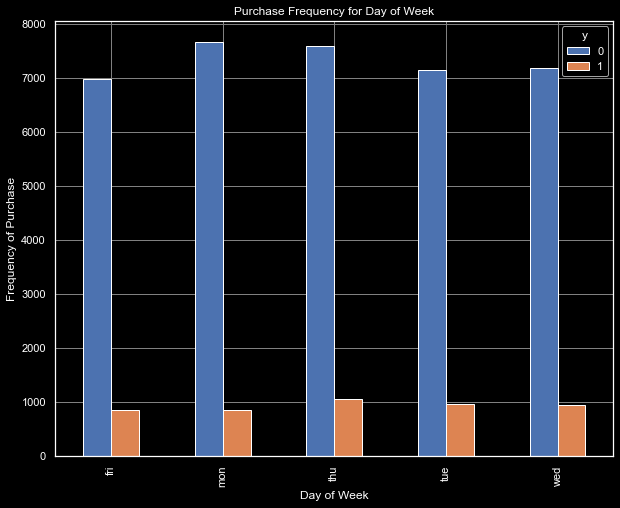

In [21]:
pd.crosstab(df.day_of_week,df.y).plot(kind='bar', figsize=(10,8))
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.show()

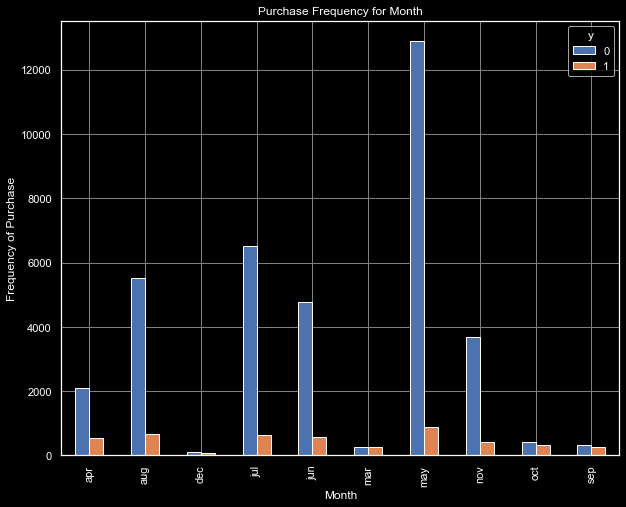

In [22]:
pd.crosstab(df.month,df.y).plot(kind='bar', figsize=(10,8))
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.show()

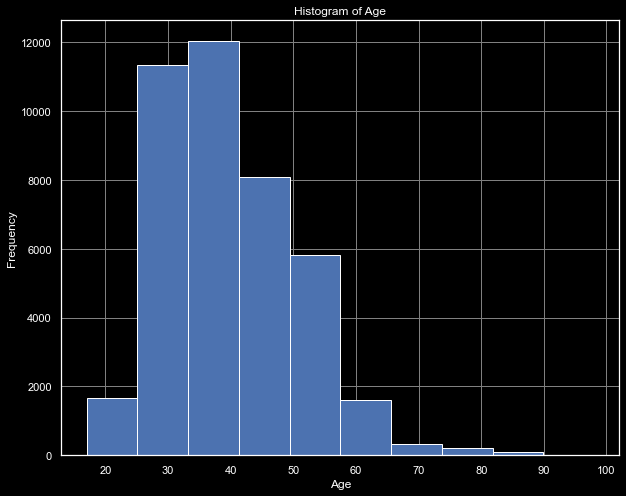

In [23]:
df.age.hist(figsize=(10,8))
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

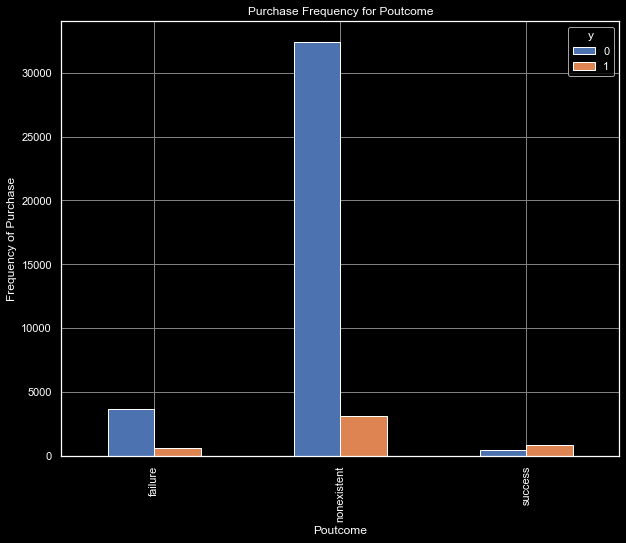

In [24]:
pd.crosstab(df.poutcome,df.y).plot(kind='bar', figsize=(10,8))
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.show()


# Data Transfrom

In [25]:
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list ='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1

In [26]:
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars = df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [27]:
data_final = df[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [28]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

# Feature Selection

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_final[X], data_final[y], test_size=0.3, random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [31]:
logreg.fit(X_train, y_train)

C:\Users\Client\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Client\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
score = logreg.score(X_test, y_test)
print(score)

0.9126001456664239
